# OpenCV Introductory Session

We start off with discussing what is OpenCV, and at the end of the session, we'll be able to produce following results.

```
<img src="images/opencv-sample-threshold.jpg"/>
<img src="images/opencv-sample-edge-HED.jpg"/>
<img src="images/opencv-sample-blur.jpg"/>
<img src="images/opencv-sample-convex-hull.jpg"/>
```

In [1]:
# Import necessary libraries
import cv2 # OpenCV 
import numpy as np # NumPy
import matplotlib.pyplot as plt 

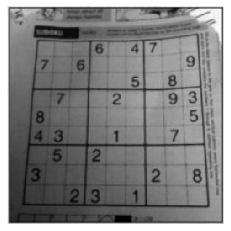

In [40]:
# Load a sample image
img = cv2.imread("images/sample-image.png", cv2.IMREAD_COLOR)
plt.axis("off");
plt.imshow(img);

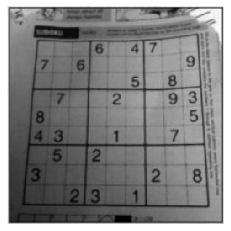

In [41]:
# Matplotlib shows image as RGB while OpenCV reads as BGR
# Convert img from BGR to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off");
plt.imshow(img_RGB);

# Playing with an image

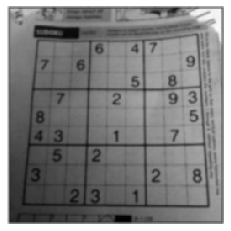

In [52]:
# Blurring an image
img_blur = cv2.GaussianBlur(img, (3, 3), 0)
img_blur_RGB = cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB)
plt.axis("off");
plt.imshow(img_blur_RGB);

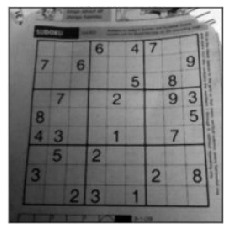

In [43]:
# Thresholding
# I only want white color

# Convert the image to grayscale (only one channel)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(img_gray, cmap='gray')

In [44]:
cv2.imshow("GrayScale Image", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
_, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
img_thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255,   0, ...,   0,   0, 255],
       [255, 255,   0, ...,   0,   0, 255],
       ...,
       [255, 255,   0, ...,   0,   0, 255],
       [255, 255,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [46]:
cv2.imshow("Threshold Image", img_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

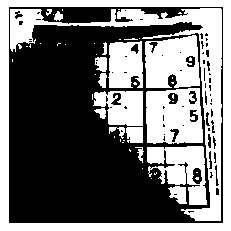

In [47]:
plt.axis("off");
plt.imshow(img_thresh, cmap='gray');

In [50]:
# Let's define a function to change thresholding value
def threshold(img, value):
    _, img_thresh = cv2.threshold(img, value, 255, cv2.THRESH_BINARY)
    return img_thresh

In [73]:
# Blur the grayscaled image
img_gray_blur = cv2.medianBlur(img_gray, 5)

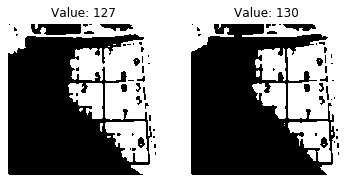

In [74]:
fig = plt.figure()

for index, val in enumerate([127, 130]):
    img_thresh = threshold(img_gray_blur, val)
    plt.subplot(1, 2, index+1)
    plt.title("Value: " + str(val))
    plt.imshow(img_thresh, cmap='gray')
    plt.axis("off");

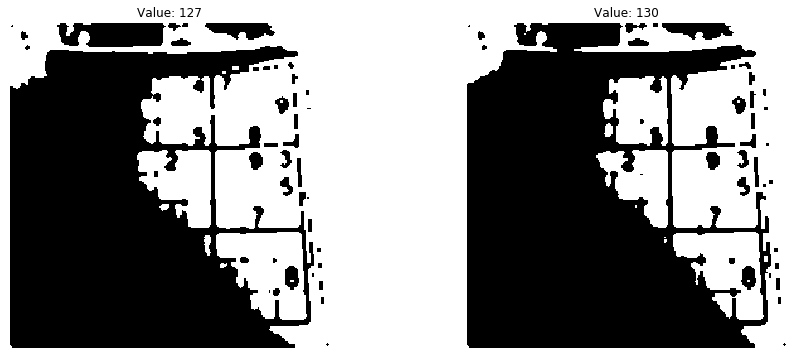

In [75]:
fig = plt.figure(figsize=(15, 6))

for index, val in enumerate([127, 130]):
    img_thresh = threshold(img_gray_blur, val)
    plt.subplot(1, 2, index+1)
    plt.title("Value: " + str(val))
    plt.imshow(img_thresh, cmap='gray')
    plt.axis("off");

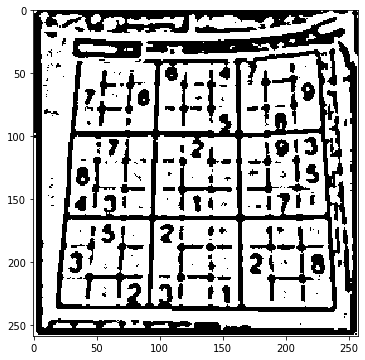

In [76]:
# Adaptive Mean Thresholding
th2 = cv2.adaptiveThreshold(img_gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY, 11, 2)

fig = plt.figure(figsize=(15, 6))
plt.imshow(th2, cmap='gray')

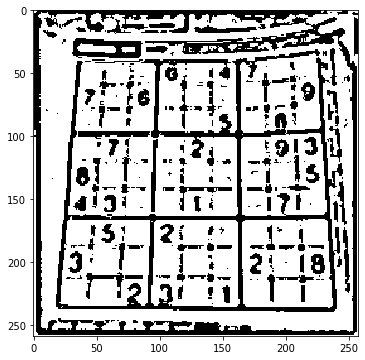

In [77]:
th3 = cv2.adaptiveThreshold(img_gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, 11, 2)
fig = plt.figure(figsize=(15, 6))
plt.imshow(th3, cmap='gray')

# Trying on a sample book page

In [78]:
img_book = cv2.imread("images/sample-book-page.jpg", 0) # Read as grayscale

In [79]:
img_book_blur = cv2.medianBlur(img_book, 5)

(-0.5, 1522.5, 799.5, -0.5)

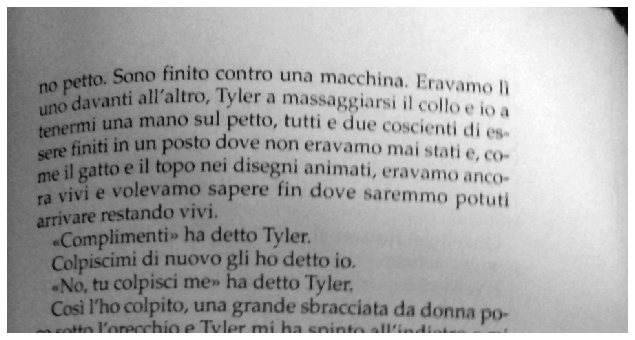

In [101]:
fig = plt.figure(figsize=(15, 6))
plt.imshow(img_book_blur, cmap='gray')
plt.axis("off")

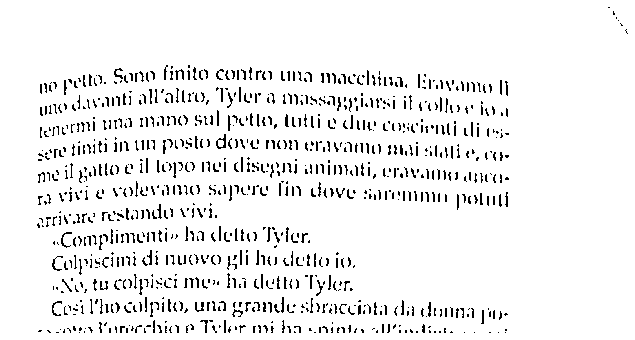

In [100]:
# Adaptive Mean Thresholding
th2 = cv2.adaptiveThreshold(img_book_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY, 15, 12)

fig = plt.figure(figsize=(15, 6))
plt.axis("off")
plt.imshow(th2, cmap='gray')

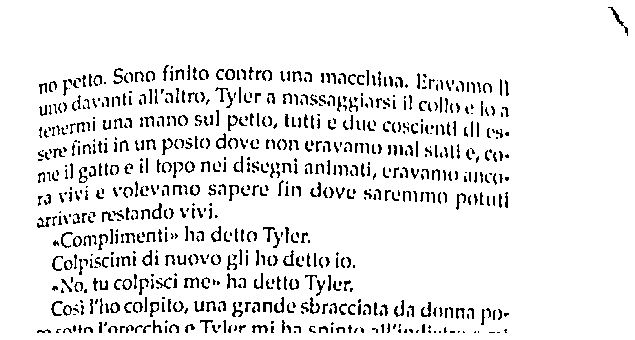

In [99]:
# Adaptive Mean Thresholding
th2 = cv2.adaptiveThreshold(img_book_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY, 19, 8)

fig = plt.figure(figsize=(15, 6))
plt.axis("off")
plt.imshow(th2, cmap='gray');

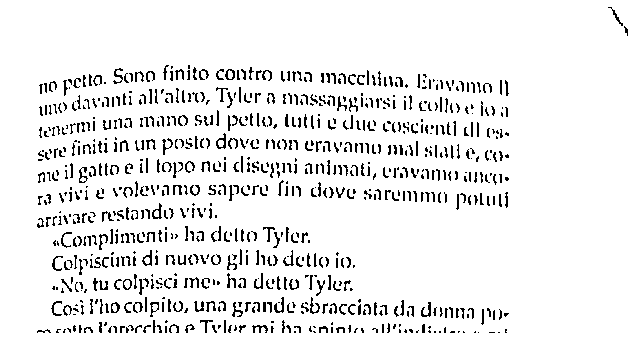

In [98]:
# Adaptive Mean Thresholding
th2 = cv2.adaptiveThreshold(img_book_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY, 15, 8)

fig = plt.figure(figsize=(15, 6))
plt.axis("off")
plt.imshow(th2, cmap='gray');

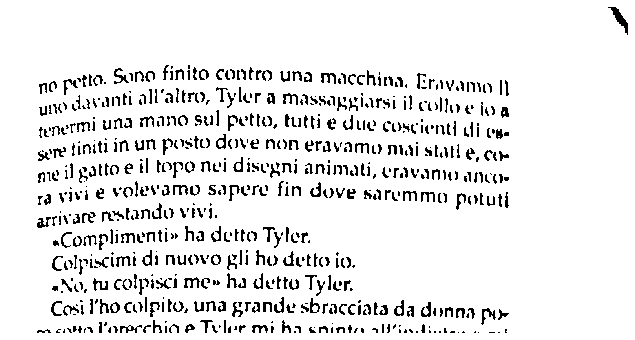

In [97]:
# Adaptive Gaussian Thresholding
gaus = cv2.adaptiveThreshold(img_book_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                             cv2.THRESH_BINARY, 91, 12)

fig = plt.figure(figsize=(15, 6))

plt.axis("off")
plt.imshow(gaus, cmap="gray");

## About Adaptive Thresholding

Source: Documentation

1. Used in cases where different lighting conditions are present. Example in the above book page.
2. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

Let's have a look at the documentation of adaptive thresholding:

```python
adaptiveThreshold(...)
    adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
    .   @brief Applies an adaptive threshold to an array.
    .   
    .   The function transforms a grayscale image to a binary image according to the formulae:
    .   -   **THRESH_BINARY**
    .   \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
    .   -   **THRESH_BINARY_INV**
    .   \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
    .   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
    .   
    .   The function can process the image in-place.
```

<img src="images/Adaptive-Thresholding.png"/>

Documentation Link: https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3

In [102]:
help(cv2.adaptiveThreshold)

Help on built-in function adaptiveThreshold:

adaptiveThreshold(...)
    adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
    .   @brief Applies an adaptive threshold to an array.
    .   
    .   The function transforms a grayscale image to a binary image according to the formulae:
    .   -   **THRESH_BINARY**
    .   \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
    .   -   **THRESH_BINARY_INV**
    .   \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
    .   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
    .   
    .   The function can process the image in-place.
    .   
    .   @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @p

# Deep Learning based HED Detection